# Ejercicios para prácticar

Sos un data scientist que trabaja para una empresa de publicidad que lanzo una campaña de publicidad en una red social. Se registró cada usuario al que se le mostró la publicidad, y se pudo obtener datos de la persona tales como `genero`, `edad` y `salario estimado`. Además se registró si el usuario luego compró el producto que la publicidad hacia referencia. Los datos están en `Social_Network_Ads.csv`. Se busca poder predecir dado un usuario con datos socioseconomicos si va a comprar o no el producto.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
url = "https://raw.githubusercontent.com/Vic-bit/aprMaqI_CEIA/main/clase3/ejercicios/datasets/Social_Network_Ads.csv"
social_network = pd.read_csv(url)

1. Realice un estudio de variables y de limpieza de datos. Analize las clases, estan balanceadas, o no? Qué clase nos parece mas importante de las dos?

In [3]:
social_network.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
5,15728773,Male,27.0,58000.0,0
6,15598044,Female,27.0,84000.0,0
7,15694829,Female,32.0,150000.0,1
8,15600575,Male,25.0,33000.0,0
9,15727311,Female,35.0,65000.0,0


Tenemos:
- User ID: es una variable categórica nominal	
- Gender: es una variable categórica nominal
- Age: es una varible continua de razón
- EstimatedSalary: 	es una varible continua de razón
- Purchased: es una varaible categórica nominal


In [4]:
social_network.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


No se ven datos faltantes

In [5]:
(social_network['Purchased']==1).value_counts()

Purchased
False    257
True     143
Name: count, dtype: int64

Se ve un desbalance de las clases donde la mayoría no compró el producto

In [6]:
#X_categ = social_network[[,,]]
#X_cuali = 

social_network_cuali = social_network[["Age","EstimatedSalary","Purchased"]]

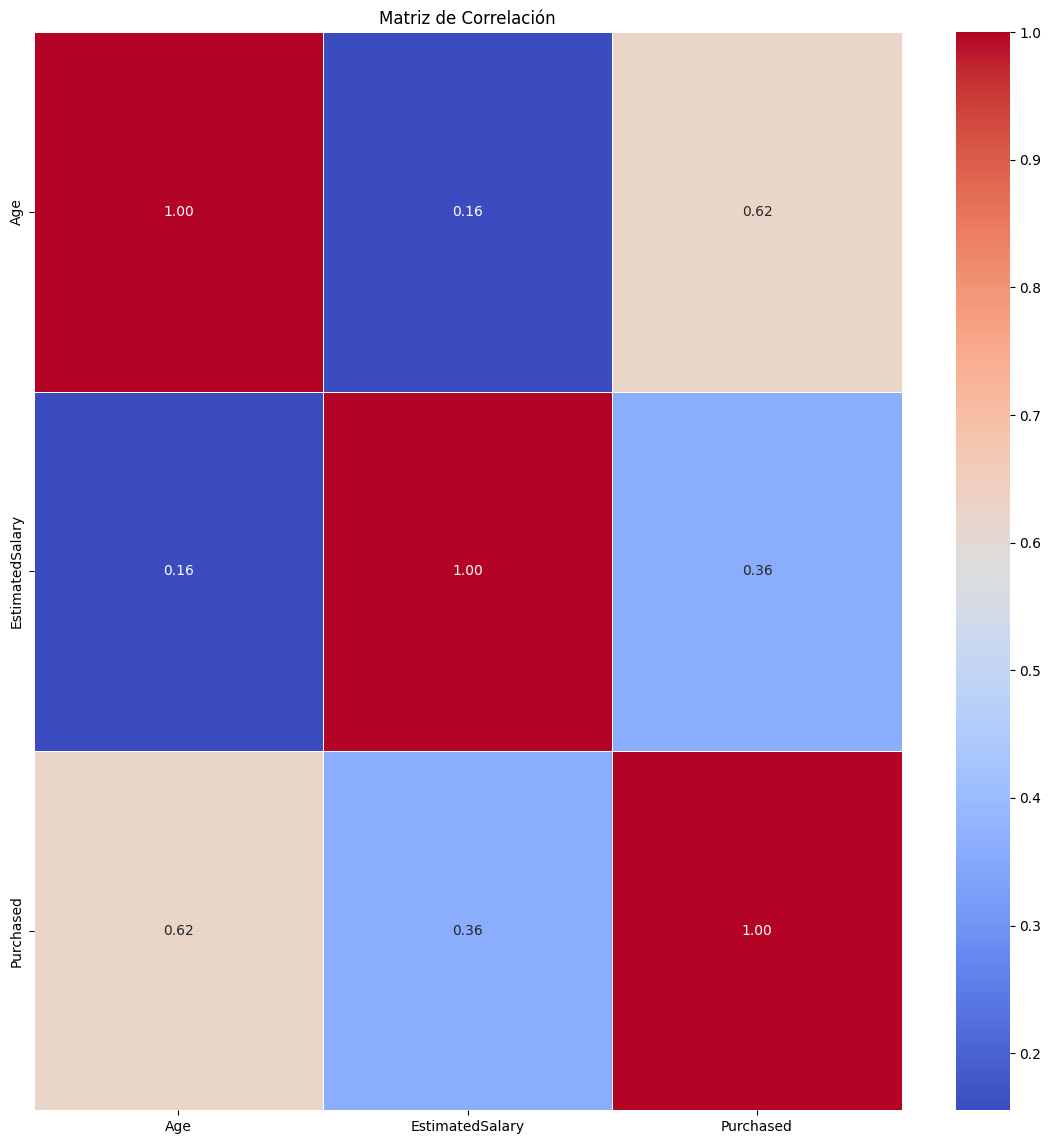

In [7]:
correlation_matrix = social_network_cuali.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

Se ve que lo haya comprado depende en gran medida de la edad y el estimado salario también pero en menor medida.

2. Separe el dataset en entrenamiento y validación.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = social_network[["User ID", "Gender", "Age", "EstimatedSalary"]].values
y = social_network["Purchased"].values
y = y.reshape([-1,1])
print('Cantidad de elementos de X: ', X.shape) #Para que quede vertical
print('Cantidad de elementos de y: ', y.shape)

Cantidad de elementos de X:  (400, 4)
Cantidad de elementos de y:  (400, 1)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.25, random_state=42)

print('Los datos de X_train tienen una dimensión de: ', X_train.shape)
print('Los datos de X_test tienen una dimensión de: ', X_test.shape)
print('Los datos de y_train tienen una dimensión de: ', y_train.shape)
print('Los datos de y_test tienen una dimensión de: ', y_test.shape)

Los datos de X_train tienen una dimensión de:  (100, 4)
Los datos de X_test tienen una dimensión de:  (300, 4)
Los datos de y_train tienen una dimensión de:  (100, 1)
Los datos de y_test tienen una dimensión de:  (300, 1)


3. Elija diferente modelos de clasificación (al menos uno de regresión logistica y uno de KNN). Elija las variables de entrada en base al analisis del punto 1.